## 의사결정트리 분류 예제 : titanic dataset을 이용한 생존여부 분류

> ### 데이터 적재 
### titanic dataset

> 타이타닉호에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 문제  
타이타닉 데이터는 데이터분석 경연 사이트인 캐글(Kaggle)에서 입문자용으로 가장 많이 사용하는 예제이다.  
  
  
* 예측 변수(Target / Lable / Class)
 - survived : 생존=1, 죽음=0

* 설명 변수 
 - PassengerId	: 승객 고유번호
 - Name	: 성명
 - Sex : 성별(male, female)
 - Age : 연령
 - pclass : 승객 등급(1등급=1, 2등급=2, 3등급=3)
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호(alphabat + integer)
 - Fare	: 요금
 - cabin : 선실 번호
 - embarked : 탑승장소(S=Southhampton, C=Cherbourg, Q=Queenstown)
  



In [38]:
# 구글 드라이브 mount (URL을 열어서 인증코드 복사하여 붙여넣기)
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
import pandas as pd
# 구글 드라이브에서 파일 읽어오기
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/python_bigdata/titanic.csv')
#data sample
df.head()

# 구글 드라이브에 파일 저장
#df.to_csv("/content/gdrive/My Drive/Colab Notebooks/python_bigdata/titanic.csv", index = False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> ### 데이터 탐색(EDA) 및 전처리

> 분석에 앞서 적재된 데이터를 확인하여 이해하고 필요한 처리를 수행

> #### 데이터 내용 확인

In [40]:
# 적재된 데이터의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
# 숫자형 변수에 대한 5-Number summary 요약 수치(통계량)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> #### Target label 확인
target label 이 어떤 분포를 가지고 있는 지 확인
이진분류 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 학습이나 평가 방법이 달라 질 수 있음

In [42]:
# 생존여부별 데이터 건수 카운트
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* seaborn :  다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지  
(시각화 기능은 Matplotlib을 기반으로 하고 통계 기능은 Statsmodels 패키지에 기반하여 구성됨) 
- documentation : https://seaborn.pydata.org/

>seaborn의 countplot을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 차트로 표시할 수 있다.

* countplot: http://seaborn.pydata.org/generated/seaborn.countplot.html
* countplot 명령은 데이터프레임에만 사용할 수 있다. 

> countplot(x="column_name", data=dataframe)
data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.

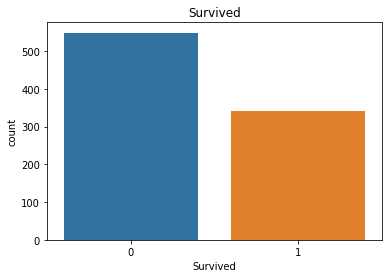

In [43]:
# 생존여부 차트 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Survived", data=df)
plt.title("Survived")
plt.show()

> #### 설명변수 확인

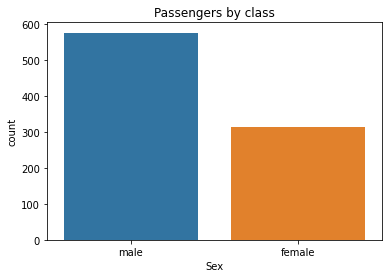

In [44]:
# 성별 데이터 건수(승객수)
sns.countplot(x="Sex", data=df)
plt.title("Passengers by class")
plt.show()

In [45]:
# 성별 by 생존여부, 2개 변수에 대한 피봇  테이블
df.pivot_table(index="Survived", columns="Sex", aggfunc="size")


Sex,female,male
Survived,,
0,81,468
1,233,109


In [47]:
# 성별 by 생존여부, 2개 변수에 대한 교차  테이블
pd.crosstab(df['Sex'], df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


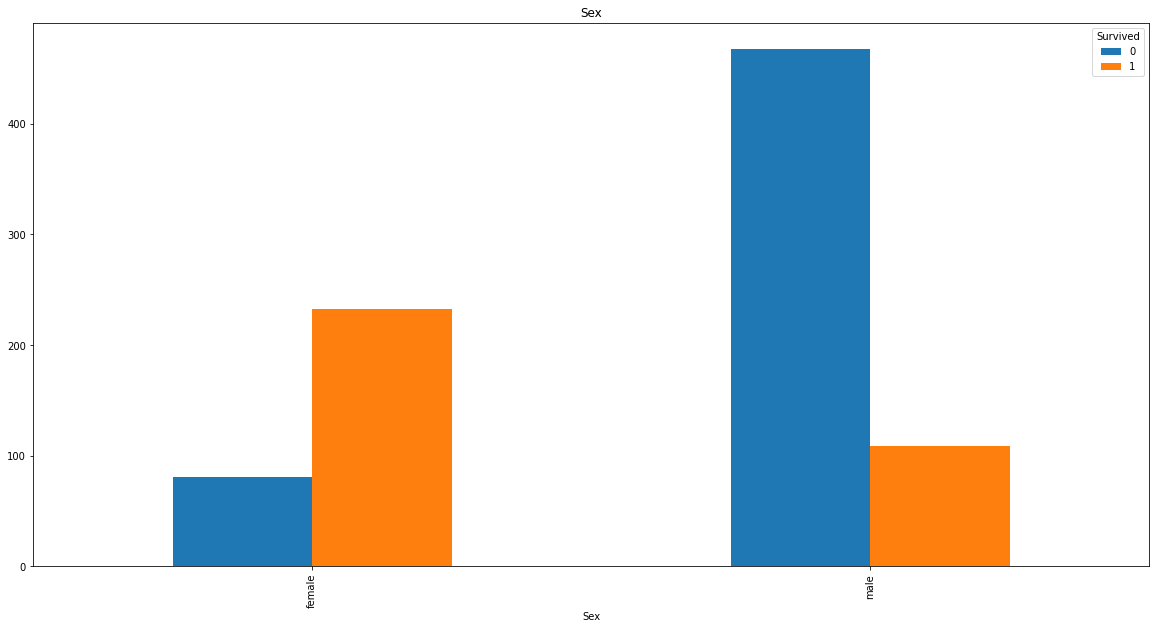

In [48]:
# 성별에 따른 생존여부 차트
# -> 여성이 남성보다 생존할 가능성이 더 높게 분포함
sex_df = df.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('Sex')
plt.show()

In [49]:
# 등급별 by 생존여부, 2개 변수에 대한 교차  테이블
pd.crosstab(df['Pclass'], df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


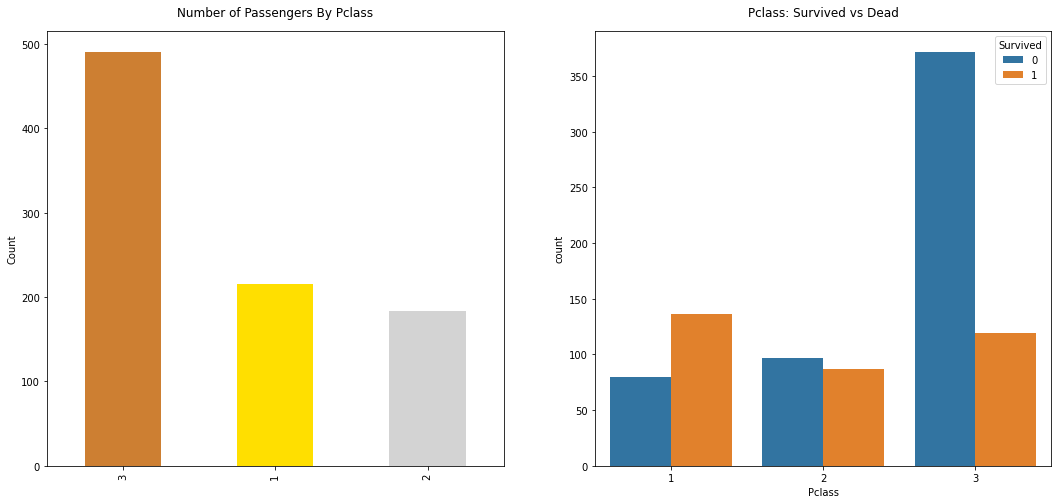

In [50]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# 등급별 데이터 건수 카운트, 3등급 > 1등급 > 2등급
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
# 등급별 생존여부 건수 카운트
# -> 1등급 탑승자의 생존율이 가장 높고 3등급 탐승자의 생존율이 가장 낮다.
sns.countplot('Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

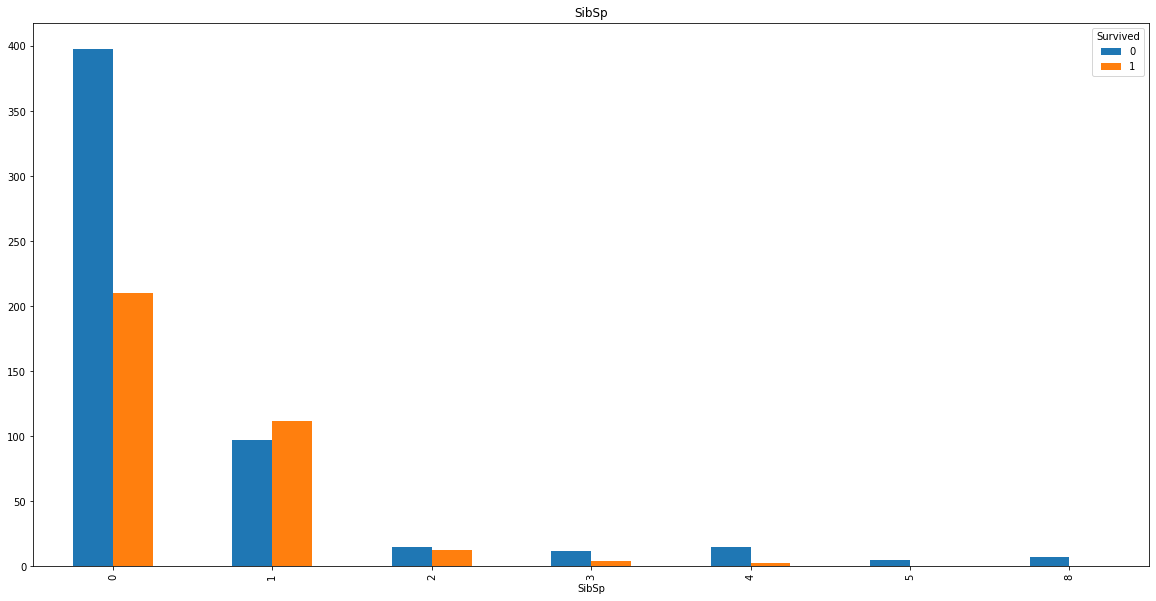

In [51]:
# 함께 탑승한 형제 또는 배우자 수에 따른 생존여부 차트
# -> 혼자인 사람보다 형제나 배우자가 있는 사람들이 생존할 가능성이 더 높게 분포함
sex_df = df.groupby(['SibSp','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('SibSp')
plt.show()

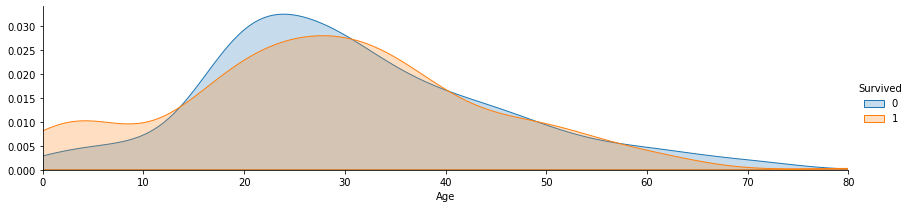

In [52]:
# 연령에 따른 생존여부 분포
# -> 나이가 어린 경우 생존자가 많고, 20-30대에 생존율이 낮음
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

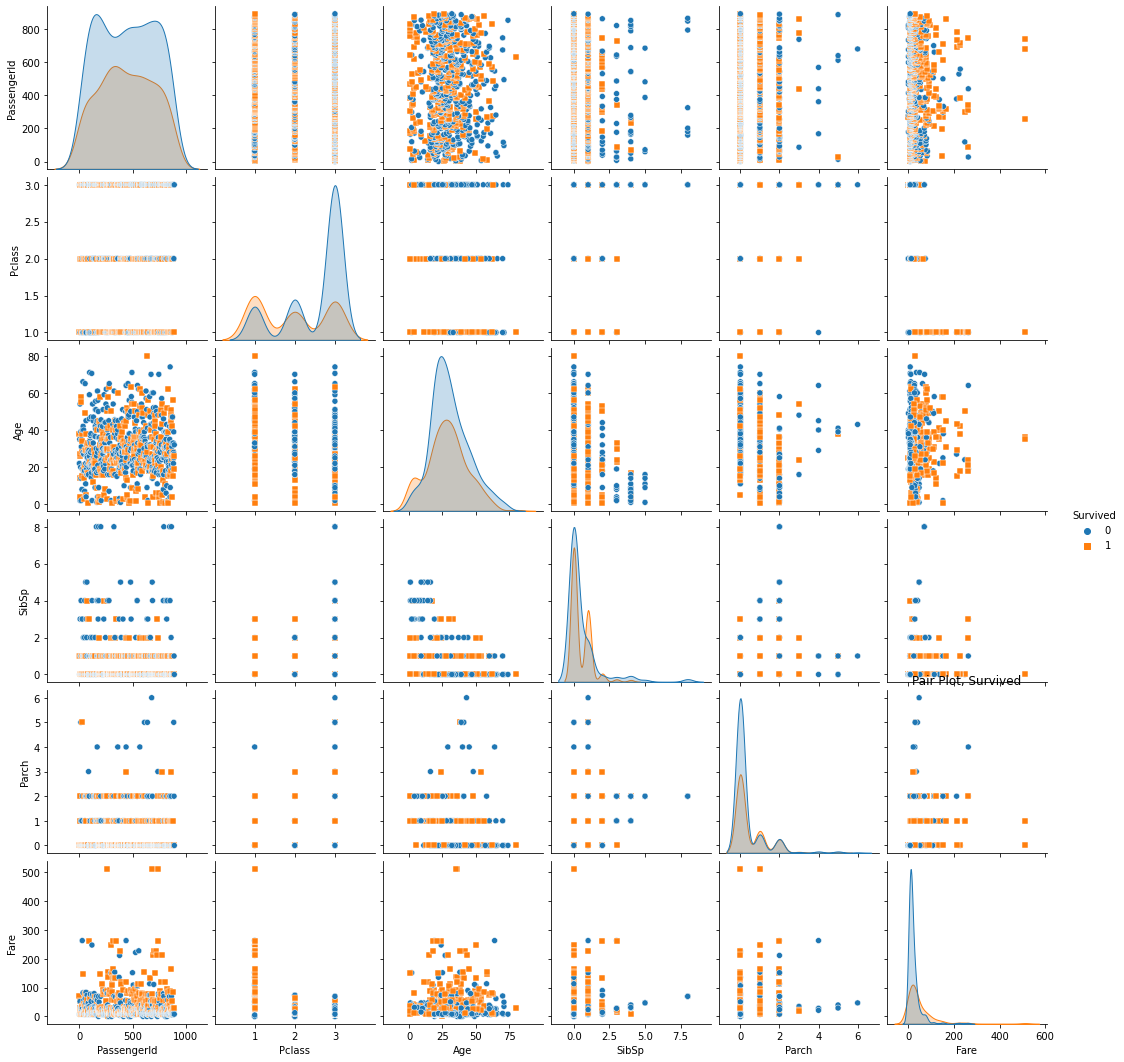

In [53]:
# 대각선으로 각변수별 생존여부의 분포와 변수간 상관관계 plot
# hue="Survived" , Survived 값에 따라 색상을 다르게
sns.pairplot(df, hue="Survived", markers=["o", "s"])
plt.title("Pair Plot, Survived")
plt.show()

> #### 데이터 전처리

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# 분석에 사용할 수 없는 데이터 삭제(고유값, 텍스트 등)
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
# 성별의 class를 확인하고 건수를 카운트
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder를 이용하여 성별을 라벨로 코딩(female = 0, male = 1)
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [60]:
# 성별의 class를 확인하고 건수를 카운트
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [61]:
# 승객등급의 class를 확인하고 건수를 카운트
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [62]:
# 승객등급을 원핫-인코딩으로 이진변수화하여 c1, c2, c3 변수 추가
# Pclass 1 => 1,0,0
# Pclass 2 => 0,1,0
# Pclass 3 => 0,0,1

from sklearn.preprocessing import LabelBinarizer
df2 = pd.DataFrame(LabelBinarizer().fit_transform(df["Pclass"]),
                    columns=['c1', 'c2', 'c3'], index=df.index)
df = pd.concat([df, df2], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,c1,c2,c3
0,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,1,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [64]:
# 원래의 승객등급 칼럼은 삭제
del(df["Pclass"])
df.head()

KeyError: ignored

In [65]:
# null data의 카운트
df.isnull().sum()

Survived      0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
c1            0
c2            0
c3            0
dtype: int64

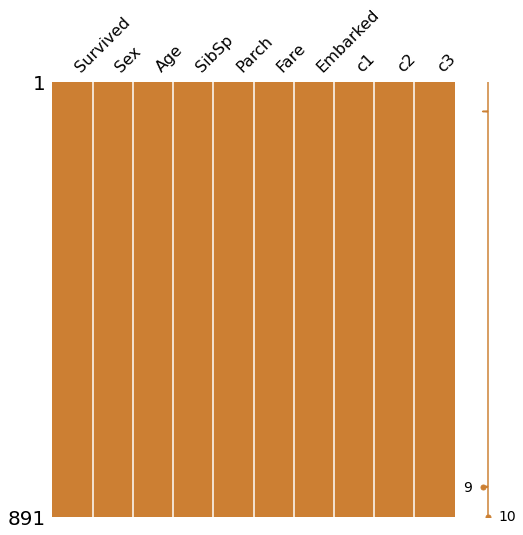

In [70]:
# null data의 존재 시각화
import missingno as msno
msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [69]:
# 누락된 Age값을 Age의 평균값으로 대체
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [71]:
# Age 확인하고 건수를 카운트
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [72]:
# Embarked값을 확인하고 건수를 카운트
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
# 누락된 Embarked값을 최빈값으로 대체
df["Embarked"].fillna('S', inplace=True)

In [75]:
# null data의 카운트
df.isnull().sum()

Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
c1          0
c2          0
c3          0
dtype: int64

> ### 학습 데이터와 시험 데이터 준비
### scikit-learn 패키지의 model_selection 서브 패키지는 KFold 클래스(k-fold cross validation)를 비롯한 다양한 모형 검증 기능을 제공

> train_test_split : 데이터를 학습용 데이터와 시험용 데이터로 분리  
train_test_split(data, data2, test_size, train_size, random_state)    
  

* data: 독립 변수 데이터 배열 또는 데이터프레임
* data2: 종속 변수 데이터(data 인수에 종속 변수 데이터가 같이 있으면 생략 가능)
* test_size: 검증용 데이터 개수(1보다 작은 실수이면 비율)
* train_size: 학습용 데이터의 개수(1보다 작은 실수이면 비율, test_size와 train_size 중 하나만 있어도 된다.)
* random_state: 난수 시드

In [76]:
from sklearn.model_selection import train_test_split

# 학습 데이터와 시험 데이터를 80:20의 비율로 분할
# 독립변수 데이터 : df[["Sex", "Age", "SibSp", "Fare", "c1", "c2", "c3"]]
# 종속변수 데이터 : df["Survived"]
# 학습용 데이터 분할 비율 80:20
X_train, X_test, y_train, y_test = train_test_split(df[["Sex", "Age", "SibSp", "Fare", "c1", "c2", "c3"]], df["Survived"], test_size=0.2, random_state=0)


In [77]:
?train_test_split

In [78]:
# 전체 891 개
# 학습 데이터 712 개
print(X_train.shape, y_train.shape)
# 시험 데이터 179 개
print(X_test.shape, y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


In [80]:
# 학습 데이터 확인
X_train,y_train

(     Sex        Age  SibSp     Fare  c1  c2  c3
 140    0  29.699118      0  15.2458   0   0   1
 439    1  31.000000      0  10.5000   0   1   0
 817    1  31.000000      1  37.0042   0   1   0
 378    1  20.000000      0   4.0125   0   0   1
 491    1  21.000000      0   7.2500   0   0   1
 ..   ...        ...    ...      ...  ..  ..  ..
 835    0  39.000000      1  83.1583   1   0   0
 192    0  19.000000      1   7.8542   0   0   1
 629    1  29.699118      0   7.7333   0   0   1
 559    0  36.000000      1  17.4000   0   0   1
 684    1  60.000000      1  39.0000   0   1   0
 
 [712 rows x 7 columns], 140    0
 439    0
 817    0
 378    0
 491    0
       ..
 835    1
 192    1
 629    0
 559    1
 684    0
 Name: Survived, Length: 712, dtype: int64)

In [81]:
# 시험 데이터 확인
X_test,y_test

(     Sex        Age  SibSp      Fare  c1  c2  c3
 495    1  29.699118      0   14.4583   0   0   1
 648    1  29.699118      0    7.5500   0   0   1
 278    1   7.000000      4   29.1250   0   0   1
 31     0  29.699118      1  146.5208   1   0   0
 255    0  29.000000      0   15.2458   0   0   1
 ..   ...        ...    ...       ...  ..  ..  ..
 780    0  13.000000      0    7.2292   0   0   1
 837    1  29.699118      0    8.0500   0   0   1
 215    0  31.000000      1  113.2750   1   0   0
 833    1  23.000000      0    7.8542   0   0   1
 372    1  19.000000      0    8.0500   0   0   1
 
 [179 rows x 7 columns], 495    0
 648    0
 278    0
 31     1
 255    1
       ..
 780    1
 837    0
 215    1
 833    0
 372    0
 Name: Survived, Length: 179, dtype: int64)

> ### 의사결정 분류 모델 학습  
### scikit-learn의 sklearn.tree.DecisionTreeClassifier 를 통해 의사결정 트리 모델을 생성하고 학습

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [82]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 트리 모델 생성하고 학습
# 불순도 지표는 entropy
# max_depth : 최대 트리 깊이
# min_samples_leaf : 리프노드의 최소 샘플수
modelDT = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)



> ### 모델 성능 평가
### scikit-learn의 metrics 서브패키지에는 예측 성능을 평가하기 위한 다양한 함수를 제공

> 분류 문제는 confusion_matrix를 통해 정확도를 산정

* Binary Confusion Matrix 

|제목|양성 예측|음성 예측|
|------|---|---|
|실제 양성|양성 예측이 맞음(True Positive)|음성 예측이 틀림(False Negative)|
|실제 음성|양성 예측이 틀림(False Positive)|음성 예측이 맞음(True Negative)|
 

In [83]:
from sklearn.metrics import confusion_matrix
# 예측값과 실제값을 비교하여 confusion matrix 생성


# 시험용 y변수와 모형으로 예측된 y값을 비교하여 confusion_matrix 계산
print(confusion_matrix(y_test, modelDT.predict(X_test)))

[[96 14]
 [17 52]]


Confusion matrix
[[96 14]
 [17 52]]


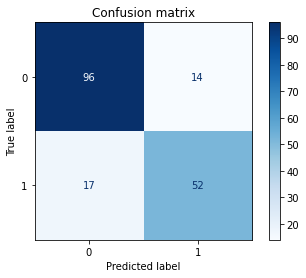

In [84]:
from sklearn.metrics import plot_confusion_matrix
#  confusion matrix plot
disp = plot_confusion_matrix(modelDT, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)

In [85]:
from sklearn.metrics import classification_report
# 각 카테고리별(생존/사망)로 평가지표 레포팅
print(classification_report(y_test, modelDT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



> ### 변수 중요도 평가
### 의사결정 트리 모델의 feature_importances_ 값을 통해 변수 중요도 평가

>* 학습된 모델에서 가장 큰 영향력이 큰 순서로 변수를 나열하여 각 변수의 중요도를 평가

>* featuure importance 를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 중요변수를 선별하여 feature selection 을 할 수 있음

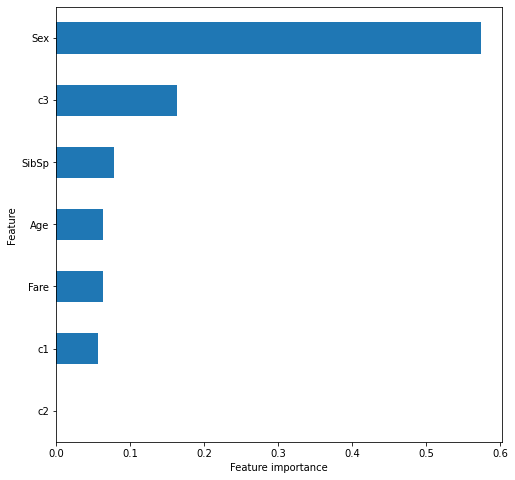

In [86]:
from pandas import Series

# 의사결정 트리의 feature_importances_ 값을 통해 변수 중요도 평가
# -> "Sex" : 성별이 가장 중요한 변수로 평가됨
# -> "c3" : 3등급 탑승여부가 두번째로 중요한 변수로 평가됨
feature_importance = modelDT.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [87]:
dir(modelDT)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_validate_X_predict',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fr

> ### 의사결정 트리 시각화
트리 패키지의 export_graphviz 함수를 이용해 트리를 시각화 할 수 있다.

이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만든다.


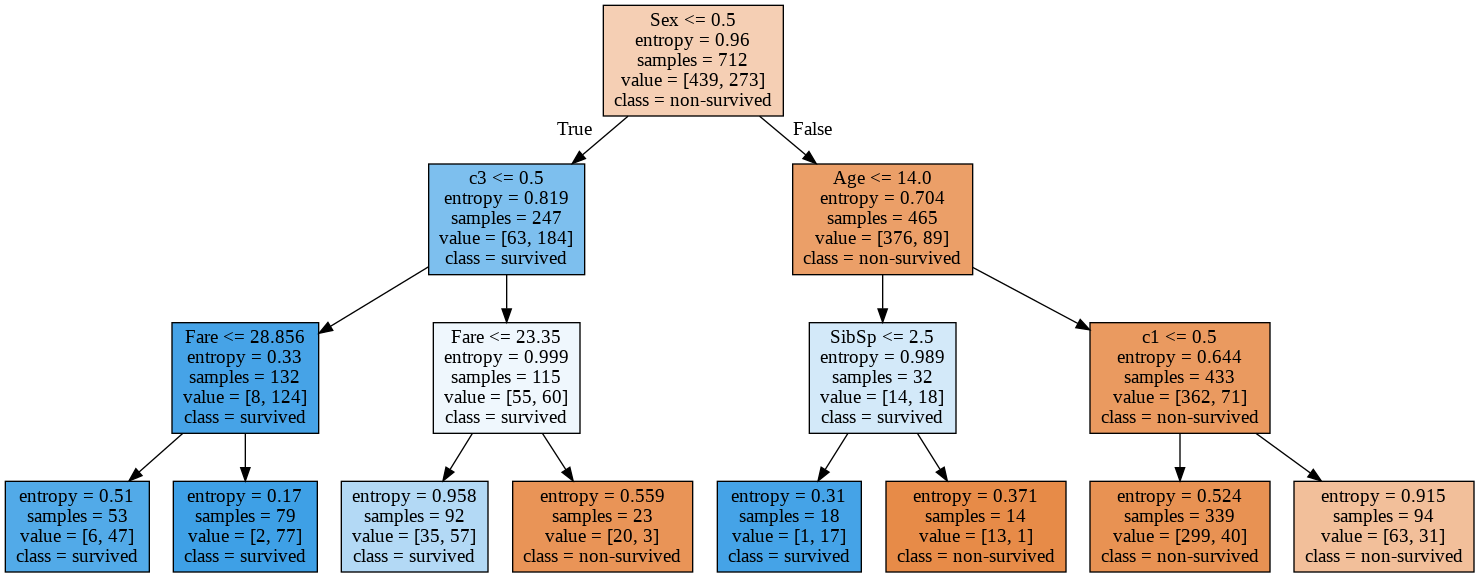

In [88]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

# dot파일 출력용 문자열 버퍼 생성
command_buf = io.StringIO()

# 학습된 모델 modelDT을 입력으로 하여 feature_names에 정의된 변수를 사용하여
# command_buf에 dot파일을 생성
# 각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵션(filled=True)
export_graphviz(modelDT, out_file=command_buf, feature_names=["Sex", "Age", "SibSp", "Fare", "c1", "c2", "c3"], class_names=['non-survived', 'survived'], filled=True)

# dot파일을 가지고 그래프를 이미지 생성
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [ ]:
?export_graphviz

In [89]:
# 구글 드라이브에 이미지 파일 저장
graph.write_png('/content/gdrive/My Drive/Colab Notebooks/python_bigdata/titanicDT.png')

In [1]:
from google.colab import drive


In [3]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/python_bigdata/titanic.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()
# 숫자형 변수에 대한 5-Number summary 요약 수치(통계량)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


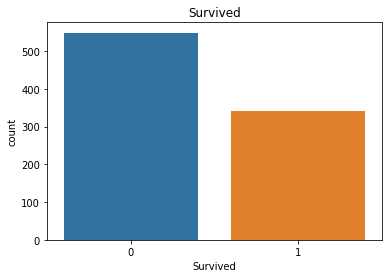

In [13]:
sns.countplot(x="Survived", data=df)
plt.title("Survived")
plt.show()

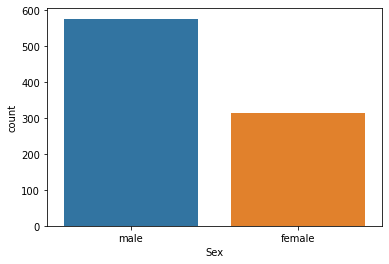

In [14]:
sns.countplot(x="Sex", data = df)

Text(0.5, 1.0, 'Passengers by class')

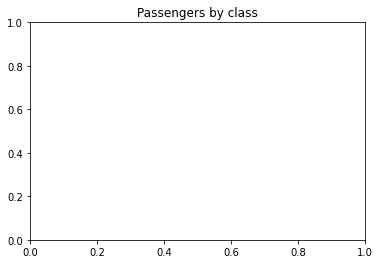

In [15]:
plt.title("Passengers by class")

In [16]:
plt.show()

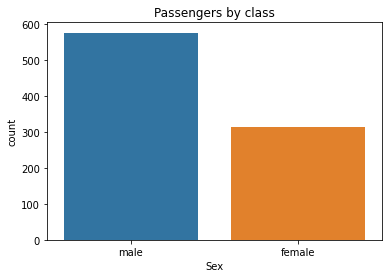

In [19]:
sns.countplot(x="Sex", data = df)
plt.title("Passengers by class")
plt.show()

In [20]:
df.pivot_table(index="Survived", columns="Sex", aggfunc="size")

Sex,female,male
Survived,,
0,81,468
1,233,109


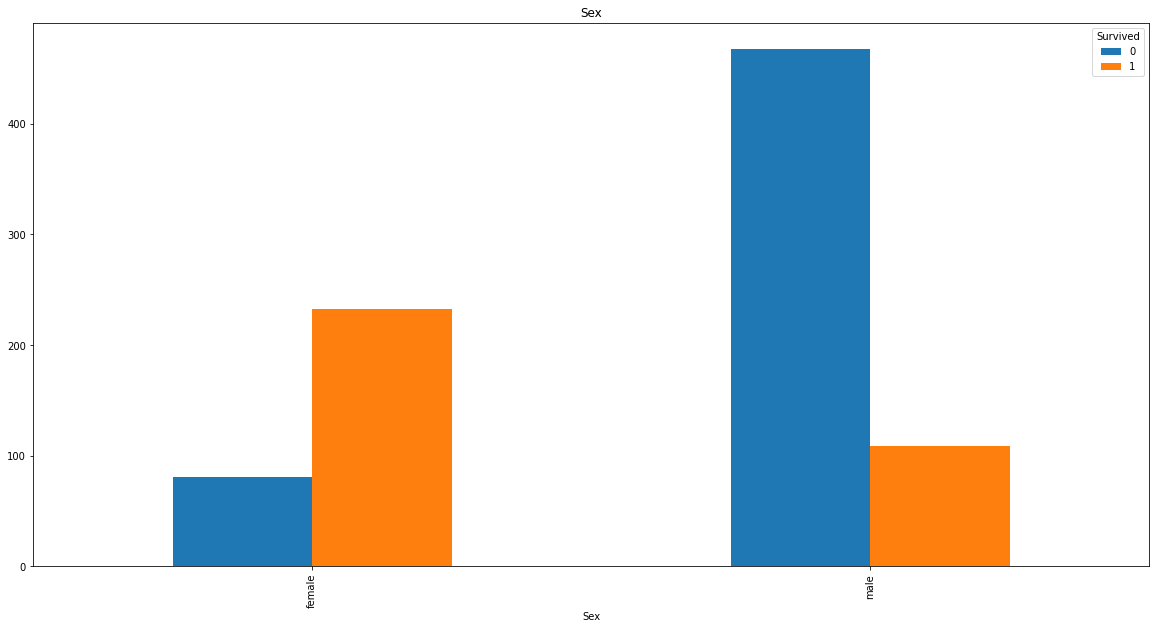

In [21]:
sex_df = df.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar',figsize=(20,10))
plt.title('Sex')
plt.show()

In [22]:
 # 등급별 by 생존여부, 2개 변수에 대한 교차 테이블
 pd.crosstab(df['Pclass'], df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


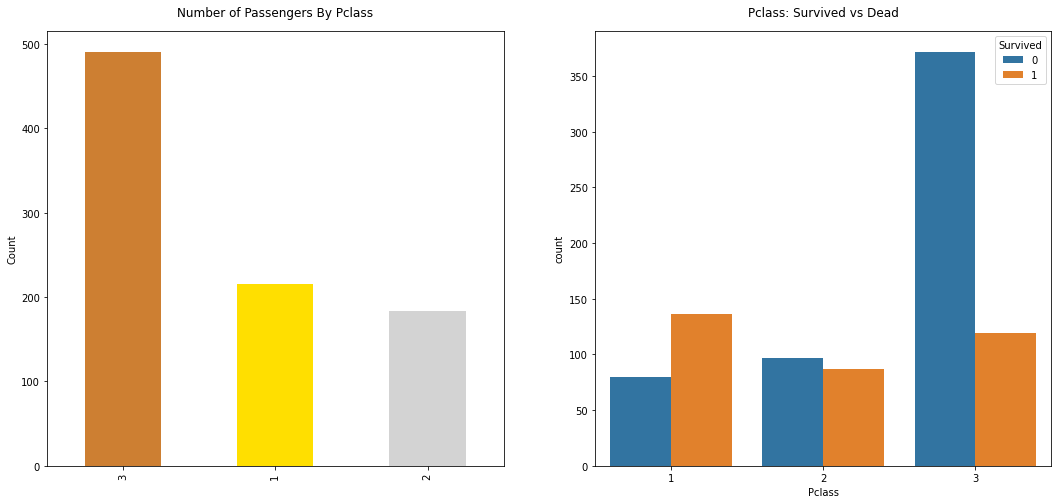

In [27]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
# 등급별 데이터 건수 카운트, 3등급 > 1등급 > 2등급
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)
plt.show()


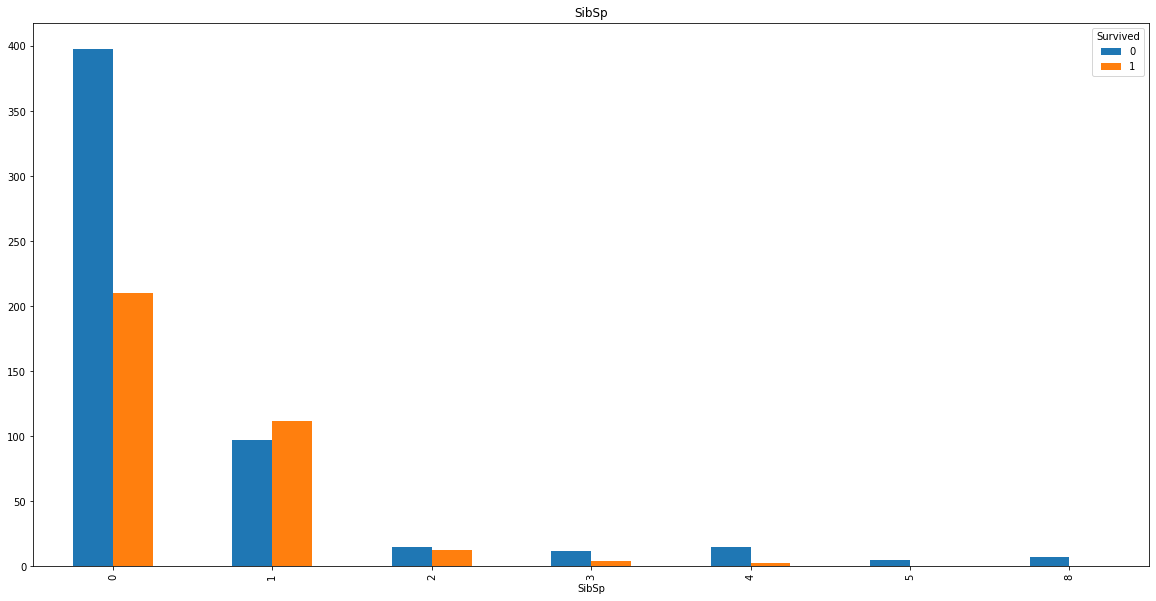

In [33]:
# 함께 탑승한 형제 또는 배우자 수에 따른 생존여부 차트
# -> 혼자인 사람보다 형제나 배우자가 있는 사람들이 생존할 가능성이 더 높게 분포함
sex_df = df.groupby(['SibSp','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar',figsize=(20,10))
plt.title('SibSp')
plt.show()

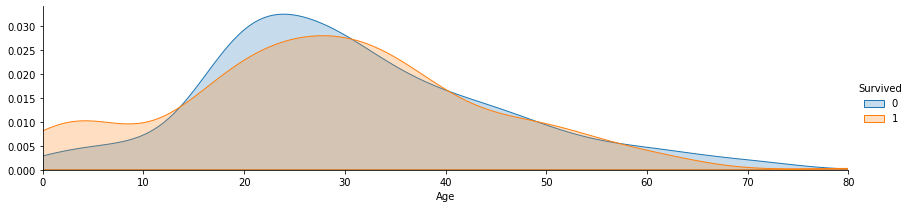

In [36]:
# 연령에 따른 생존여부 분포
# -> 나이가 어린 경우 생존자가 많고, 20-30대에 생존률이 낮음
facet = sns.FacetGrid(df,hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")
plt.show()